In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt




In [59]:
data = pd.read_csv("onlinefraud .csv")
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [60]:
# Remove isFlaggedFraud column
data.drop(columns=['isFlaggedFraud'], inplace=True)


In [61]:
data.shape


(6362620, 10)

In [62]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [63]:
print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [64]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
print(data.head())


   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In [65]:
# Analyze fraud distribution
print(data['isFraud'].value_counts(normalize=True))

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


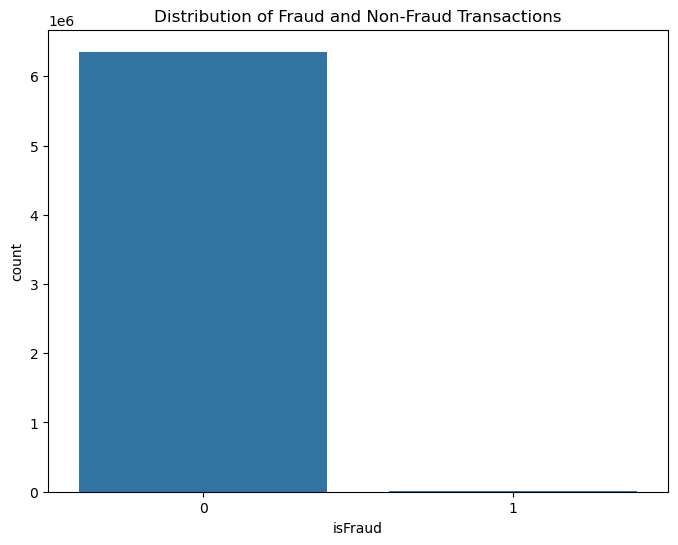

In [66]:
# Visualize fraud distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()

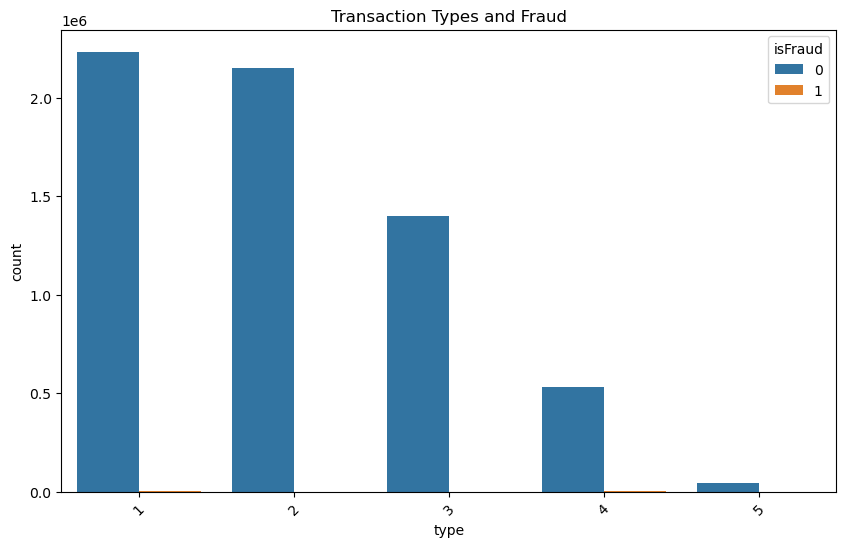

In [67]:
# Visualize transaction types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data, hue='isFraud')
plt.title('Transaction Types and Fraud')
plt.xticks(rotation=45)
plt.show()

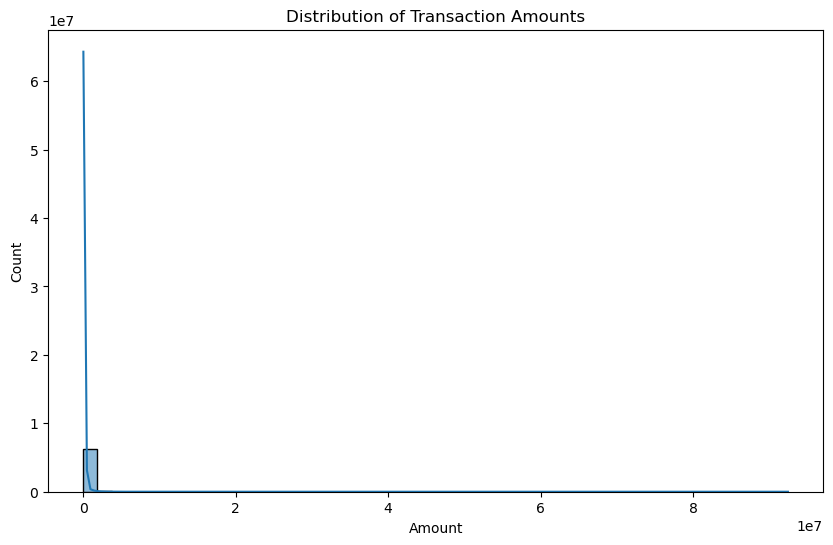

In [68]:
# Analyze amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

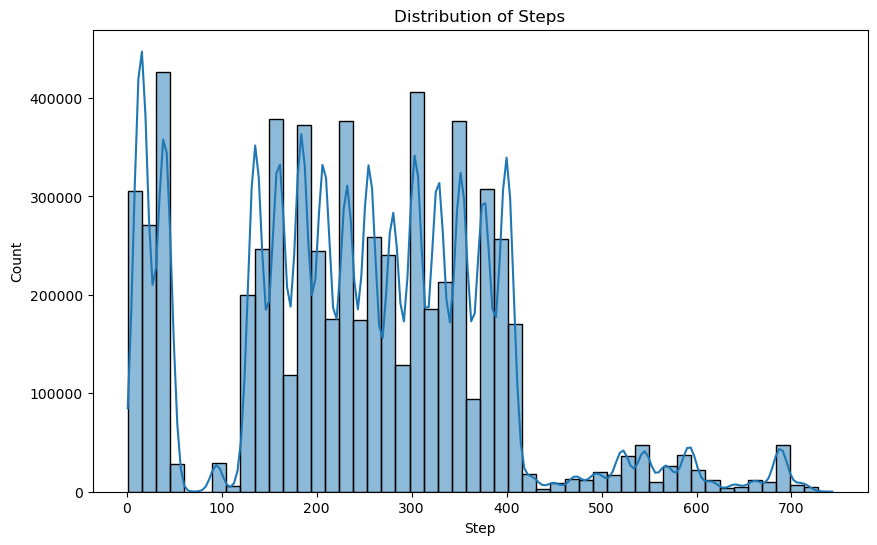

In [69]:
# Analyze step distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['step'], bins=50, kde=True)
plt.title('Distribution of Steps')
plt.xlabel('Step')
plt.show()


In [70]:
# 1. Transaction Type Analysis
type_counts = data['type'].value_counts()
fraud_by_type = data[data['isFraud'] == 1]['type'].value_counts()

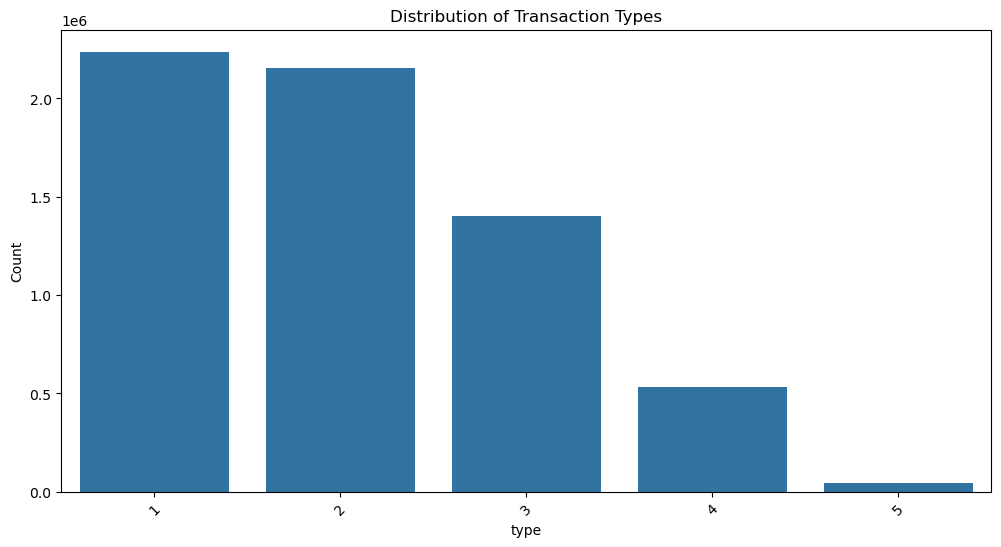

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Distribution of Transaction Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


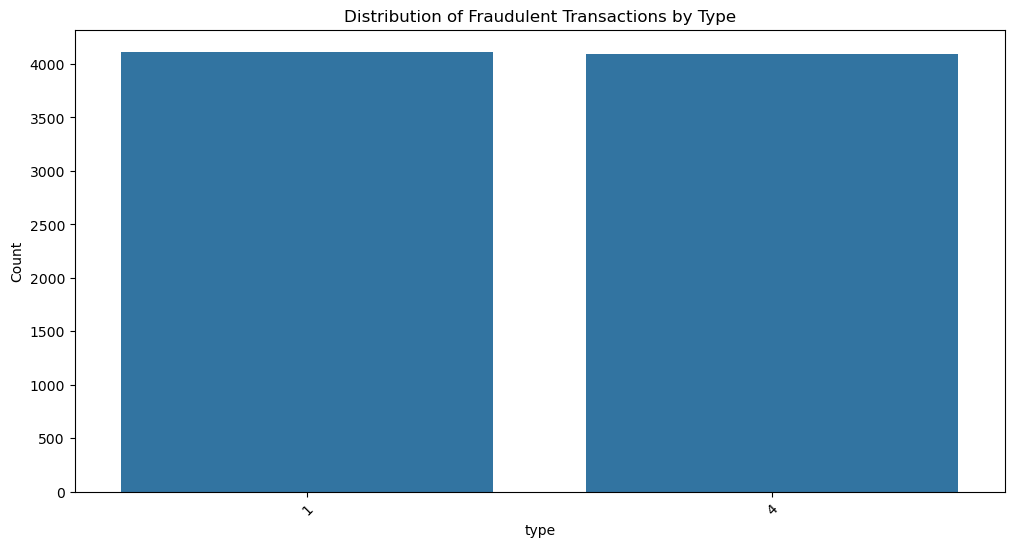

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.title('Distribution of Fraudulent Transactions by Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [74]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_columns]

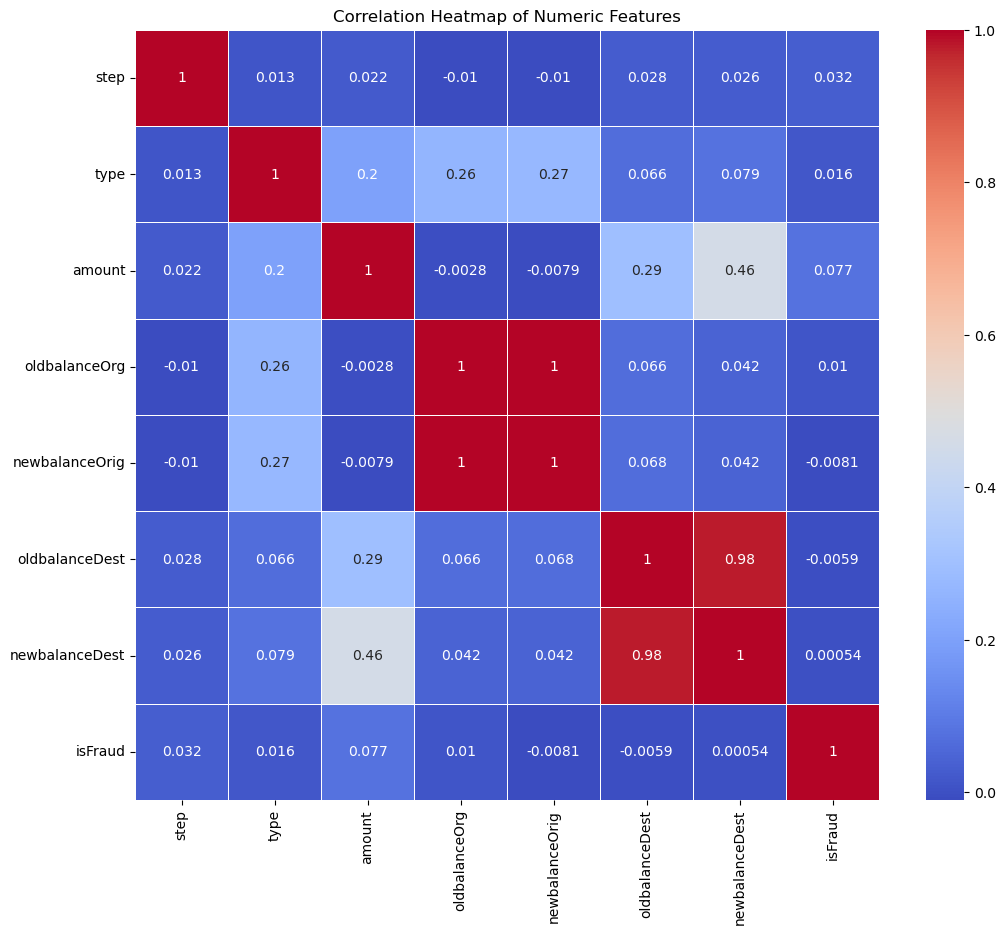

In [75]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [76]:
# Print correlation with isFraud
fraud_correlation = correlation_matrix['isFraud'].sort_values(ascending=False)
print("\nCorrelation with isFraud:")
print(fraud_correlation)


Correlation with isFraud:
isFraud           1.000000
amount            0.076688
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


Data Preprocessing

In [82]:
# Drop 'nameOrig' and 'nameDest' 
X = data.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = data['isFraud']

In [84]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Separate normal and fraudulent transactions
X_train_normal = X_train_scaled[y_train == 0]
X_test_normal = X_test_scaled[y_test == 0]
X_test_fraud = X_test_scaled[y_test == 1]


In [88]:
# Build the autoencoder
input_dim = X_train_scaled.shape[1]
encoding_dim = 5

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="linear")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [89]:
# Train the autoencoder on normal transactions
history = autoencoder.fit(X_train_normal, X_train_normal, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_data=(X_test_normal, X_test_normal),
                          verbose=1)

Epoch 1/50


2024-09-19 20:28:49.155646: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


19858/19858 [==============================] - 8s 413us/step - loss: 0.0700 - val_loss: 0.0464
Epoch 2/50
19858/19858 [==============================] - 7s 375us/step - loss: 0.0464 - val_loss: 0.0465
Epoch 3/50
19858/19858 [==============================] - 8s 382us/step - loss: 0.0464 - val_loss: 0.0471
Epoch 4/50
19858/19858 [==============================] - 7s 375us/step - loss: 0.0464 - val_loss: 0.0465
Epoch 5/50
19858/19858 [==============================] - 7s 374us/step - loss: 0.0464 - val_loss: 0.0464
Epoch 6/50
19858/19858 [==============================] - 7s 372us/step - loss: 0.0464 - val_loss: 0.0464
Epoch 7/50
19858/19858 [==============================] - 7s 375us/step - loss: 0.0464 - val_loss: 0.0464
Epoch 8/50
19858/19858 [==============================] - 8s 391us/step - loss: 0.0464 - val_loss: 0.0464
Epoch 9/50
19858/19858 [==============================] - 8s 418us/step - loss: 0.0464 - val_loss: 0.0464
Epoch 10/50
19858/19858 [==============================] 

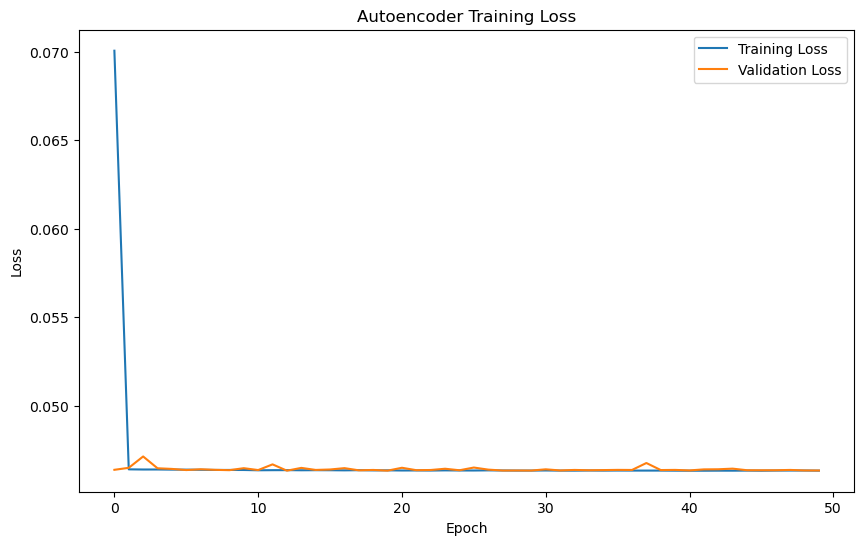

In [90]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [91]:
# Compute reconstruction error for all data
X_train_pred = autoencoder.predict(X_train_scaled)
X_test_pred = autoencoder.predict(X_test_scaled)
train_mse = np.mean(np.power(X_train_scaled - X_train_pred, 2), axis=1)
test_mse = np.mean(np.power(X_test_scaled - X_test_pred, 2), axis=1)

39767/39767 [==============================] - 10s 252us/step


In [93]:
# Create new feature sets with original features and reconstruction error
X_train_with_mse = np.column_stack((X_train_scaled, train_mse))
X_test_with_mse = np.column_stack((X_test_scaled, test_mse))

In [100]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [101]:
# Define resampling strategy

undersampler = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
oversampler = SMOTENC(categorical_features=[1], sampling_strategy=0.5, random_state=42)


In [105]:
# Create and apply resampling pipeline
resampling_pipeline = Pipeline([
    ('undersampler', undersampler),
    ('oversampler', oversampler)
])

X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train_with_mse, y_train)

print("\nResampled training set distribution:\n", pd.Series(y_train_resampled).value_counts())




Resampled training set distribution:
 isFraud
0    65930
1    32965
Name: count, dtype: int64
